<a href="https://colab.research.google.com/github/priyanships31/ipl-t20-cricket-analysis/blob/main/Priyanshi_Singh_24_02_2021_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [89]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading data from the csvs

In [82]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/teams.csv'
teams_df=pd.read_csv(file_path)

In [83]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/deliveries.csv'
deliveries_df=pd.read_csv(file_path)

In [84]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [85]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/matches.csv'
matches_df=pd.read_csv(file_path)
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [86]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/teamwise_home_and_away.csv'
teamwise_home_and_away_df=pd.read_csv(file_path)

In [87]:
teamwise_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [71]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/most_runs_average_strikerate.csv'
most_runs_average_strikerate_df=pd.read_csv(file_path)

In [72]:
most_runs_average_strikerate_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [73]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/Players.xlsx'
players_df=pd.read_excel(file_path)

In [74]:
players_df

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India


### Results for different teams in playing in IPL

In [75]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [76]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [77]:
# creating a column for season year
matches_df[['year']] = matches_df['Season'].str.split('-',expand = True)[1]
matches_df['year'] = matches_df['year'].astype(int)

### Which season had the most number of IPL matches

In [109]:
matches_df["Season"].value_counts() 

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2016    60
IPL-2018    60
IPL-2014    60
IPL-2010    60
IPL-2019    60
IPL-2015    59
IPL-2017    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [130]:
# IPL-2013 had the most number of matches
matches_df[matches_df['Season'] == 'IPL-2013']['result'].value_counts() 

Mumbai Indians                 13
Chennai Super Kings            12
Rajasthan Royals               11
Sunrisers Hyderabad            10
Royal Challengers Bangalore     9
Kings XI Punjab                 8
Kolkata Knight Riders           6
Pune Warriors                   4
Delhi Daredevils                3
Name: winner, dtype: int64

###  Player who was Man of the match of highest number of times 

In [129]:
matches_df['player_of_match'].value_counts()  # CH Gayle has been Man of the Match for the most time

CH Gayle             21
AB de Villiers       20
DA Warner            17
RG Sharma            17
MS Dhoni             17
                     ..
KK Cooper             1
Mohammed Shami        1
LR Shukla             1
SB Jakati             1
Mustafizur Rahman     1
Name: player_of_match, Length: 226, dtype: int64

In [132]:
matches_df[matches_df['player_of_match'] == 'CH Gayle']['winner'].value_counts() 

Royal Challengers Bangalore    17
Kings XI Punjab                 3
Kolkata Knight Riders           1
Name: winner, dtype: int64

### Winner Team in each season

In [78]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets,year
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529,2013.444444
std,3464.478148,0.156630,23.471144,3.387963,3.366895
min,1.000000,0.000000,0.000000,0.000000,2008.000000
25%,189.750000,0.000000,0.000000,0.000000,2011.000000
50%,378.500000,0.000000,0.000000,4.000000,2013.000000
75%,567.250000,0.000000,19.000000,6.000000,2016.000000
max,11415.000000,1.000000,146.000000,10.000000,2019.000000


### Thus the IPL matches start from the year 2008 to 2019, so we need to explore the data from 2008 to 2019

In [80]:
# Winner per season 

teams_season = pd.DataFrame(matches_df.groupby('year')['winner'].value_counts())

teams_season

winner
year winner                             
2008 Rajasthan Royals                 13
     Kings XI Punjab                  10
     Chennai Super Kings               9
     Delhi Daredevils                  7
     Mumbai Indians                    7
...                                  ...
2019 Kings XI Punjab                   6
     Kolkata Knight Riders             6
     Sunrisers Hyderabad               6
     Rajasthan Royals                  5
     Royal Challengers Bangalore       5

[100 rows x 1 columns]

In [81]:
# Winner in all seasons
year = 2008
win_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for item,item2 in teams_season.iterrows():    
  
  if item[0]==year:
    
    win_df = pd.DataFrame({'year':[item[0]],'team':[item[1]],'wins':[item2[0]]})
    win_season_df = win_season_df.append(win_df)
    year+=1
win_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


In [ ]:
matches_df.head()

### Home Win and Away Wins in visual representation

In [88]:
teamwise_home_and_away_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


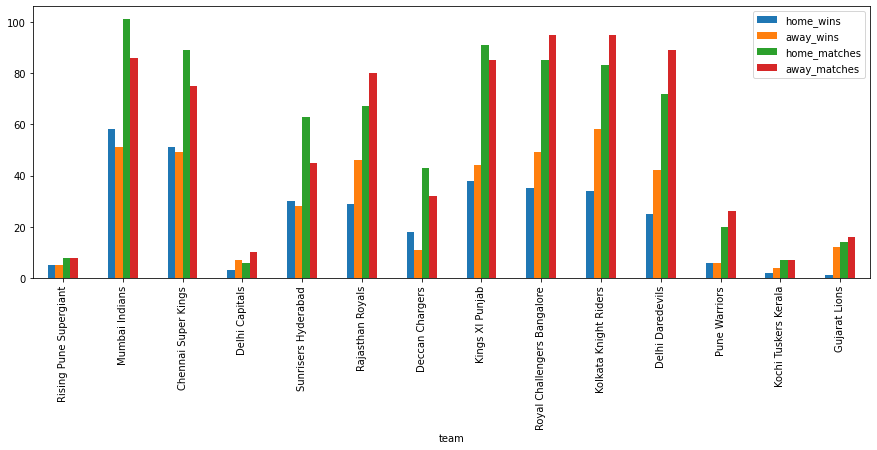

In [128]:
# Graphical representation of home wins and away wins for various teams with their respective home matches and away matches
teamwise_home_and_away_df.plot(x = 'team', y = ['home_wins','away_wins','home_matches','away_matches'], kind ='bar',width = 0.5,figsize=(15,5))

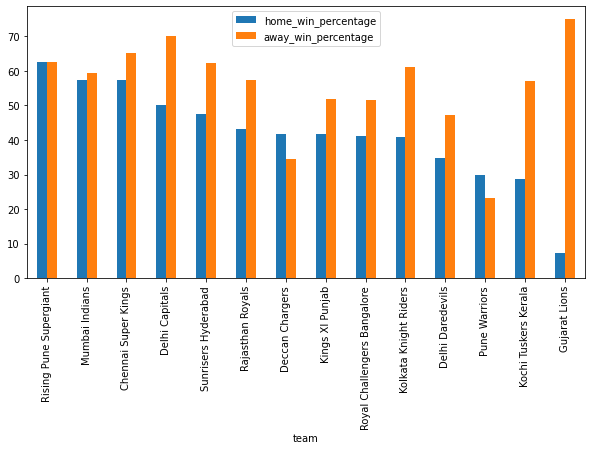

In [125]:
# Home win percentage and away win percentage for various teams
teamwise_home_and_away_df.plot(x = 'team', y = ['home_win_percentage','away_win_percentage'], kind ='bar',width = 0.5,figsize=(10,5))

## Gujarat Lions has more away win percentage and least home win, while Rising Pune Supergiant has maximum home wins and equally away wins